### Neural Networks using regularization 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
## importing dataset
file_pth='dataset/data.mat'
data = loadmat(file_pth)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [3]:
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

Text(0.5, 1.0, 'Position of players on football field')

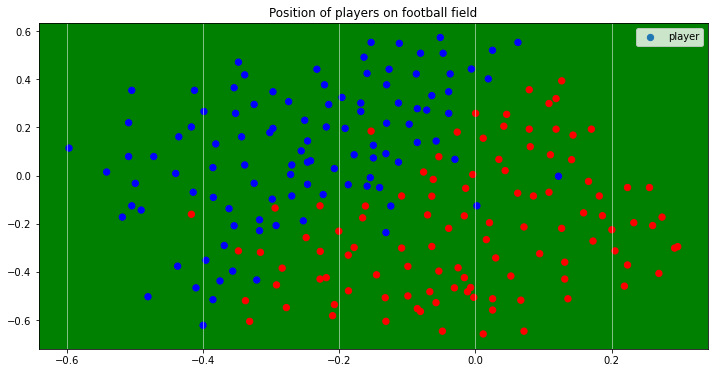

In [4]:
import matplotlib.colors as mcolors
plt.figure(figsize=(12,6))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("green")
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40,cmap=mcolors.ListedColormap(["red", "blue"]));
plt.legend(['player','opponent'])
plt.grid(axis='x',color = "white", linewidth = "0.5")
plt.title('Position of players on football field')

### UNDERSTANDING DATA SET 
##### Data contains positions of player from last 10 games
Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.

###### If the dot is yellow, it means the French player managed to hit the ball with his/her head
###### If the dot is purple, it means the other team's player hit the ball with their head.
## Goal: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.

In [5]:
n=train_X.shape[0]
m=train_X.shape[1]
print('Number of Training examples m:',m)
print('Numnber of features n:',n)

Number of Training examples m: 211
Numnber of features n: 2


In [6]:
n_test=test_X.shape[0]
m_test=test_X.shape[1]
print('Number of Training examples m:',m_test)
print('Numnber of features n:',n_test)

Number of Training examples m: 200
Numnber of features n: 2


In [7]:
from NN_L2_regularization import NN_deep_layered,predict,forward_propagation,predict

### Running test cases to check if our NN is working or not

In [8]:
!pytest test_NN_regular.py 

============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.4.2, py-1.8.1, pluggy-0.13.1
rootdir: C:\Users\VISWAMBHAR YASA\ML\Deep_learning\DEEP_LEARNING\Neural_network\Regularization
collected 3 items

test_NN_regular.py ...                                                   [100%]

============================== 3 passed in 0.20s ==============================


## Using NN without regulariation lamda=0

In [9]:
layer_dims=[20, 3, 1]
para,cost=NN_deep_layered(train_X,train_Y,layer_dims,num_iter=5000,learning_rate=0.1,lamdb=0,print_cost=True,p_ty='He')

Number of Hidden layers in this Neural Network 3
Units in each layer [20, 3, 1]
At Iteration 0  Cost Function  0.8125812458748696
At Iteration 1000  Cost Function  0.22440589407310232
At Iteration 2000  Cost Function  0.2160753226661236
At Iteration 3000  Cost Function  0.2062751369548253
At Iteration 4000  Cost Function  0.19482472144633897


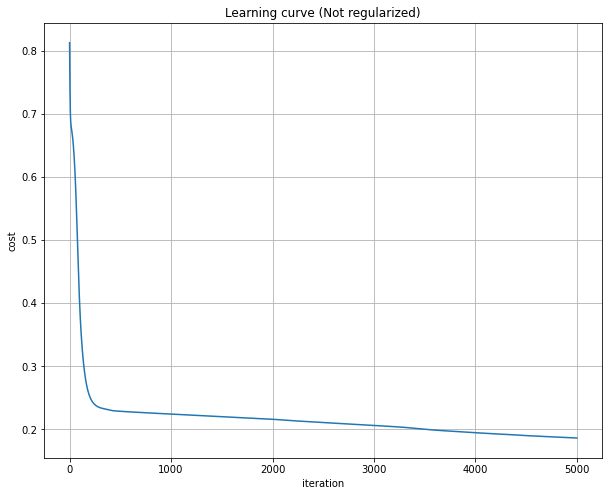

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(cost)
plt.title('Learning curve (Not regularized)')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.grid()

In [11]:
print('TRAINING DATASET')
p_train=predict(train_X,train_Y,para)

TRAINING DATASET
Hidden layer of the Neural Network 3
Accuracy: 94.7867298578199%


In [12]:
print('TESTING DATASET')
p_train=predict(test_X,test_Y,para)

TESTING DATASET
Hidden layer of the Neural Network 3
Accuracy: 94.49999999999999%


Text(0.5, 1.0, 'Position of players on football field')

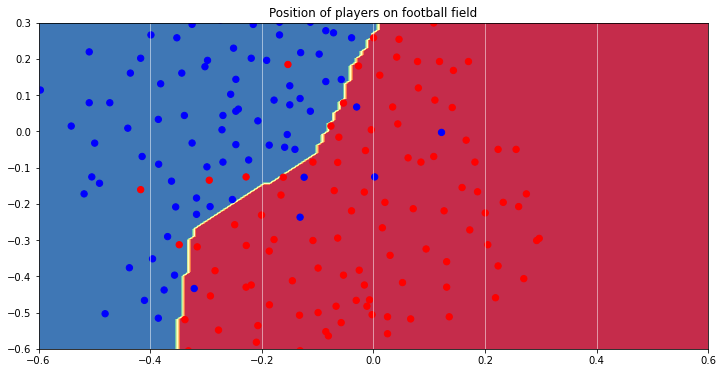

In [13]:
def pred(X, parameters, tol=0.5):
    m = X.shape[1]
    n_layers = len(parameters) // 2
    p = np.zeros((1, m))
    # Forward propagation
    probas, fw_caches = forward_propagation(X, parameters)
    # Activation function
    for i in range(0, probas.shape[1]):
        if probas[0, i] > tol:
            p[0, i] = 1
        else:
            p[0, i] = 0
    return p
X=train_X
Y=train_Y
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.figure(figsize=(12,6))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("green")
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40,cmap=mcolors.ListedColormap(["red", "blue"]));

plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.3)
plt.grid(axis='x',color = "white", linewidth = "0.5")
plt.title('Position of players on football field')

## Running NN using regularization


Regularized Neural Network witj lamda= 0
Number of Hidden layers in this Neural Network 3
Units in each layer [20, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 3
Accuracy: 94.7867298578199%
TESTING DATASET
Hidden layer of the Neural Network 3
Accuracy: 94.49999999999999%

Regularized Neural Network witj lamda= 0.5
Number of Hidden layers in this Neural Network 3
Units in each layer [20, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 3
Accuracy: 92.89099526066352%
TESTING DATASET
Hidden layer of the Neural Network 3
Accuracy: 92.99999999999999%

Regularized Neural Network witj lamda= 1
Number of Hidden layers in this Neural Network 3
Units in each layer [20, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 3
Accuracy: 92.41706161137442%
TESTING DATASET
Hidden layer of the Neural Network 3
Accuracy: 93.49999999999999%

Regularized Neural Network witj lamda= 5
Number of Hidden layers in this Neural Network 3
Units in each layer [20, 3, 1]
TRAINING DATASET

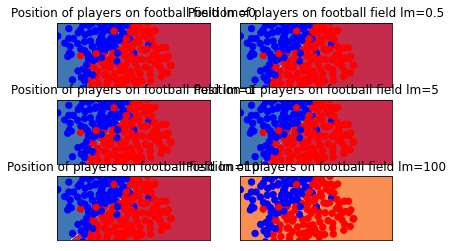

In [14]:
import math as m
lamdba=[0,0.5,1,5,10,100] 
cols = 2
rows = m.ceil(len(lamdba) / cols)
for i,lm in enumerate(lamdba):
    print('\nRegularized Neural Network witj lamda=',lm)
    para,cost=NN_deep_layered(train_X,train_Y,layer_dims,num_iter=5000,learning_rate=0.1,lamdb=lm,print_cost=False,p_ty='He')
    print('TRAINING DATASET')
    p_train=predict(train_X,train_Y,para)
    print('TESTING DATASET')
    p_train=predict(test_X,test_Y,para)
    plt.subplot(rows,cols,i+1)
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
# Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
    Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40,cmap=mcolors.ListedColormap(["red", "blue"]));
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.3)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.grid(axis='x',color = "white", linewidth = "0.5")
    plt.title('Position of players on football field lm={}'.format(lm))